# Part A: Classification Problem

* **Name** Acharya Atul
* **Matriculation Number** U1923502C
* **Email** atul001@e.ntu.edu.sg

# Question 1

### Install the latest version of tensorflow

In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator

### Neccessary Imports

* **pandas** - Data analysis and manipulation
* **matplotlib** - Plotting graphs and creating visuals
* **sklearn** - Basic data preprocessing and splitting dataset
* **tensorflow** - Modeling neural networks and training them
* **graphviz** - Visualization of model architecture

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import graphviz
from keras.utils.vis_utils import plot_model

2022-10-08 14:21:44.152027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 14:21:44.341334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-08 14:21:44.341372: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 14:21:44.381984: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to r

### Setting the seed for reproducability

>For this assignment we will be using 42 as the seed

In [3]:
SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

### Reading dataset

In [4]:
df = pd.read_csv('../input/assignment/full.csv')
df.head()

,filename,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_var,chroma_cq_mean,chroma_cq_var,chroma_cens_mean,chroma_cens_var,...,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var
0,app_3001_4001_phnd_neg_0000.wav,184.570312,623,69.222222,0.515281,0.093347,0.443441,0.082742,0.249143,0.021261,...,-10.669799,63.340282,1.811605,58.117188,-3.286546,54.268448,-2.719069,59.548176,-4.559987,70.774803
1,app_3001_4001_phnd_neg_0001.wav,151.999081,521,74.428571,0.487201,0.094461,0.542182,0.073359,0.274423,0.008025,...,-5.666375,90.256195,1.573594,105.070496,-0.742024,82.417496,-1.961745,119.312355,1.513660,101.014572
2,app_3001_4001_phnd_neg_0002.wav,112.347147,1614,146.727273,0.444244,0.099268,0.442014,0.083224,0.264430,0.013410,...,-5.502390,73.079750,0.202623,72.040550,-4.021009,73.844353,-5.916223,103.834824,-2.939086,113.598824
3,app_3001_4001_phnd_neg_0003.wav,107.666016,2060,158.461538,0.454156,0.100834,0.424370,0.084435,0.257672,0.016938,...,-8.812989,93.791893,-0.429413,60.002579,-4.013513,82.544540,-5.858006,84.402092,0.686969,90.126389
4,app_3001_4001_phnd_neg_0004.wav,75.999540,66,33.000000,0.478780,0.100000,0.414859,0.089313,0.252143,0.019757,...,-6.584204,64.973305,0.744403,68.908516,-6.354805,66.414391,-6.555534,47.852840,-4.809713,73.033966


In [5]:
df['label'] = df['filename'].str.split('_').str[-2]

In [6]:
df['label'].value_counts()

pos    92826
neg    89428
Name: label, dtype: int64

### Function to preprocess the dataset and split it into train and test

In [7]:
def split_dataset(df, columns_to_drop, test_size, random_state):
    label_encoder = preprocessing.LabelEncoder()

    df['label'] = label_encoder.fit_transform(df['label'])

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    df_train2 = df_train.drop(columns_to_drop,axis=1)
    y_train2 = df_train['label'].to_numpy()

    df_test2 = df_test.drop(columns_to_drop,axis=1)
    y_test2 = df_test['label'].to_numpy() 

    return df_train2, y_train2, df_test2, y_test2


### Function to appropriately scale the dataset

In [8]:
def preprocess_dataset(df_train, df_test):

    standard_scaler = preprocessing.StandardScaler()
    df_train_scaled = standard_scaler.fit_transform(df_train)

    df_test_scaled = standard_scaler.transform(df_test)

    return df_train_scaled, df_test_scaled

### Preprocess and scale the dataset

In [9]:
columns_to_drop = ['label','filename']

X_train, y_train, X_test, y_test = split_dataset(df, columns_to_drop, test_size=0.3, random_state=0) # positive labels being encoded as 1

X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

## Part A

>  Use the training dataset to train the model for 100 epochs. Implement early
stopping with patience of 3. 

### Model Definition
>Below is the definition of a feedforward deep neural network (DNN) which consists of an input layer, three hidden
layers of 128 neurons each with ReLU activation function, and an output layer with sigmoid
activation function.

In [10]:
def create_model(input_shape):
    """
    Returns a neural network with the required specifications
    
    :param input_shape: Number of features fed to the neural network
    """
    
    # Size of every hidden layer
    num_neurons = 128

    model = Sequential([
        InputLayer(input_shape=(input_shape,)),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Adam optimizer with learning rate 0.001
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    return model

### Model Creation and summary table

In [11]:
input_shape = X_train.shape[1]
model = create_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9984      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

2022-10-08 14:21:57.004007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-08 14:21:57.004075: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 14:21:57.004109: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (507d52f4cf37): /proc/driver/nvidia/version does not exist
2022-10-08 14:21:57.004439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

### Visualization of model architecture

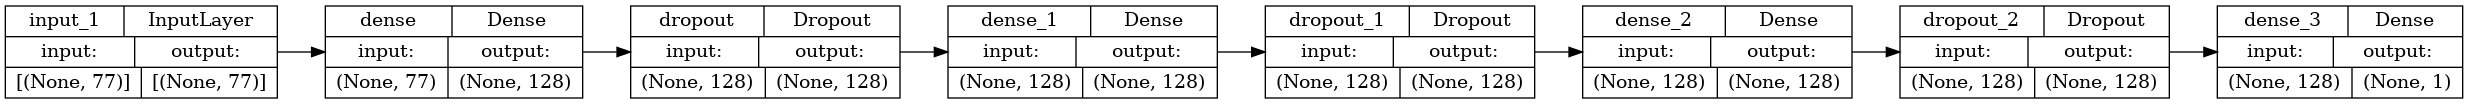

In [12]:
plot_model(model, show_shapes=True, rankdir="LR")

### Creation of Early Stopping callback
>Early stopping monitors **val_loss** and **patience = 3**.<br> 
**Note**: val_accuracy can also be monitored

In [13]:
def early_stopping(monitor='val_loss', patience=3):
    return [EarlyStopping(monitor=monitor, patience=patience)]

### Training Neural Network
> Training Specifications:
<br>
**Batch Size**: 256 <br>
**Number of Epochs**: 100

In [14]:
num_epochs = 100
batch_size = 256

history = model.fit(X_train_scaled, y_train, 
                epochs=num_epochs, 
                batch_size=batch_size, 
                verbose = 2,
                callbacks=early_stopping(monitor='val_loss', patience=3),
                validation_data=(X_test_scaled, y_test)
            )

Epoch 1/100
499/499 - 4s - loss: 0.6898 - accuracy: 0.5365 - val_loss: 0.6846 - val_accuracy: 0.5518 - 4s/epoch - 7ms/step
Epoch 2/100
499/499 - 3s - loss: 0.6834 - accuracy: 0.5526 - val_loss: 0.6816 - val_accuracy: 0.5565 - 3s/epoch - 6ms/step
Epoch 3/100
499/499 - 3s - loss: 0.6803 - accuracy: 0.5582 - val_loss: 0.6799 - val_accuracy: 0.5623 - 3s/epoch - 6ms/step
Epoch 4/100
499/499 - 3s - loss: 0.6775 - accuracy: 0.5657 - val_loss: 0.6763 - val_accuracy: 0.5681 - 3s/epoch - 6ms/step
Epoch 5/100
499/499 - 3s - loss: 0.6745 - accuracy: 0.5713 - val_loss: 0.6738 - val_accuracy: 0.5738 - 3s/epoch - 5ms/step
Epoch 6/100
499/499 - 3s - loss: 0.6707 - accuracy: 0.5785 - val_loss: 0.6716 - val_accuracy: 0.5783 - 3s/epoch - 5ms/step
Epoch 7/100
499/499 - 3s - loss: 0.6672 - accuracy: 0.5852 - val_loss: 0.6668 - val_accuracy: 0.5885 - 3s/epoch - 5ms/step
Epoch 8/100
499/499 - 3s - loss: 0.6632 - accuracy: 0.5914 - val_loss: 0.6632 - val_accuracy: 0.5943 - 3s/epoch - 5ms/step
Epoch 9/100
499/

## Part B
>Plot train and test accuracies and losses on training and test data against training
epochs and comment on the line plots. Explain the use of early stopping in this
question.

### Plot of Model Accuracy against number of epochs

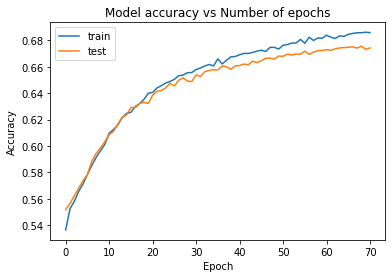

In [15]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy vs Number of epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

### Plot of Model Loss against number of epochs

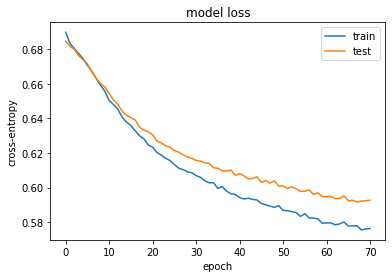

In [16]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Purpose of Early Stopping
> As we can see from the Loss plot, the train loss and test loss decrease as the number of epochs increases. However somewhere after the 60th epoch, the train loss decreases much more than the test loss and slowly the test loss starts to plateua and increase. <br>
This is a sign of overfitting and Early Stopping cut short the training as soon as the validation loss stopped improving